In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

Text(0, 0.5, 'sepal width (cm)')

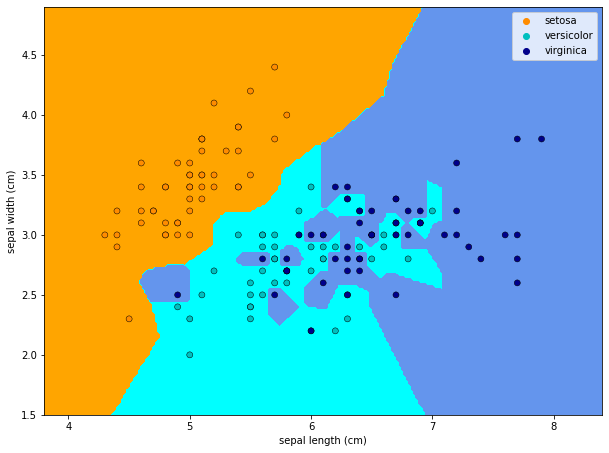

In [2]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z_1 = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_1 = Z_1.reshape(xx.shape)

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

plt.figure(figsize=(10, 7.5))
plt.contourf(xx, yy, Z_1, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[Y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


Text(0, 0.5, 'Cross-Validated Accuracy')

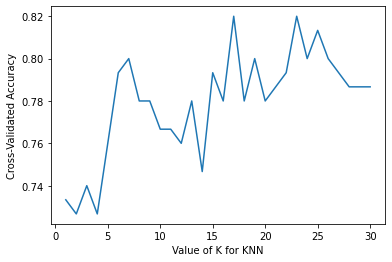

In [3]:
# Choose optimal k

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())# plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [4]:
k_star = np.where(k_scores == max(k_scores))[0][0]+1
k_star

17

Text(0, 0.5, 'sepal width (cm)')

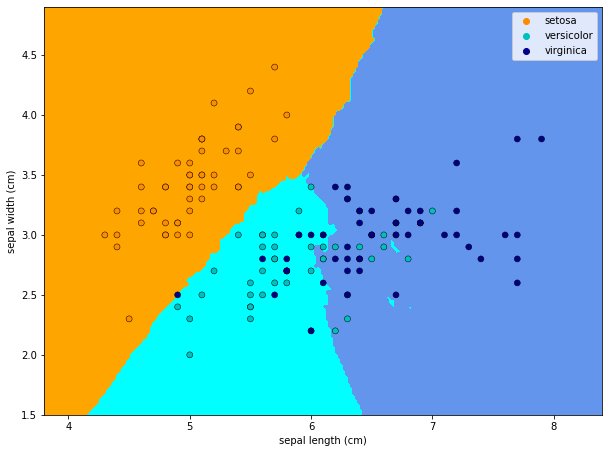

In [5]:
knn_2 = KNeighborsClassifier(n_neighbors=k_star)
knn_2.fit(X, Y)

Z_2 = knn_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_2 = Z_2.reshape(xx.shape)

plt.figure(figsize=(10, 7.5))
plt.contourf(xx, yy, Z_2, cmap=cmap_light)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[Y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])